In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from rake_nltk import Rake
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
df = pd.read_csv('85000.csv')

/var/folders/lz/yc63l1w5699_d91kctnmf8gm0000gn/T/ipykernel_8811/1811044519.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('85000.csv')


# Data Preprocessing

### 1. Formatting year and sorting by year (latest on top)

In [3]:
for i in range(len(df)):
    old = (df.loc[i, "year"])
    new = str(old)[-4:]
    df.at[i, 'year'] = int(new)

df.sort_values('year', ascending=False, inplace=True)

### 2. Dropping insignificant columns

In [4]:
significantCols = ['genre', 'director', 'actors', 'title', 'description', 'language', 'reviews_from_users', 'reviews_from_critics', 'year']
insignificantCols = []


#dropping insignificant columns
for column in df:
  if not str(df[column].name) in significantCols:
    insignificantCols.append(str(df[column].name))

df = df.drop(columns=insignificantCols)
df.head()

,title,year,genre,language,director,actors,description,reviews_from_users,reviews_from_critics
84788,Todos os Mortos,2020,Drama,Portuguese,"Marco Dutra, Caetano Gotardo","Mawusi Tulani, Clarissa Kiste, Carolina Bianch...",1899. The fates of the women in two families b...,NaN,13.0
54060,Maniyarayile Ashokan,2020,"Comedy, Romance",Malayalam,Shamzu Zayba,"Jacob Gregory, Anupama Parameshwaran, S.V. Kri...",When his unlucky horoscope doesn't bode well f...,34.0,5.0
52592,Mrs. Serial Killer,2020,"Crime, Drama, Thriller","Hindi, English",Shirish Kunder,"Jacqueline Fernandez, Manoj Bajpayee, Mohit Ra...",When a doctor gets jailed for a string of shoc...,5261.0,19.0
54025,A Day & A Night,2020,Drama,Arabic,Ayman Makram,"Khaled Nabawy, Ahmad El-Fishawi, Dorra Zarrouk...",The film revolves around an officer who undert...,2.0,NaN
52591,Class of '83,2020,"Action, Crime, Drama",Hindi,Atul Sabharwal,"Bobby Deol, Geetika Tyagi, Monika Panwar, Vish...",The story of an upright policeman-turned-train...,194.0,22.0


### 3. Replacing all Null values by 'None'

In [5]:
df.fillna('None',inplace=True)

### 4. Drop any duplicate entries and consider only top 20000 movies (due to limited computational power)

In [6]:
df.drop_duplicates(subset="title", keep=False, inplace=True, ignore_index=True)
df.drop(range(20000, len(df)),axis=0,inplace=True)
df

,title,year,genre,language,director,actors,description,reviews_from_users,reviews_from_critics
0,Todos os Mortos,2020,Drama,Portuguese,"Marco Dutra, Caetano Gotardo","Mawusi Tulani, Clarissa Kiste, Carolina Bianch...",1899. The fates of the women in two families b...,None,13.0
1,Maniyarayile Ashokan,2020,"Comedy, Romance",Malayalam,Shamzu Zayba,"Jacob Gregory, Anupama Parameshwaran, S.V. Kri...",When his unlucky horoscope doesn't bode well f...,34.0,5.0
2,Mrs. Serial Killer,2020,"Crime, Drama, Thriller","Hindi, English",Shirish Kunder,"Jacqueline Fernandez, Manoj Bajpayee, Mohit Ra...",When a doctor gets jailed for a string of shoc...,5261.0,19.0
3,A Day & A Night,2020,Drama,Arabic,Ayman Makram,"Khaled Nabawy, Ahmad El-Fishawi, Dorra Zarrouk...",The film revolves around an officer who undert...,2.0,None
4,Class of '83,2020,"Action, Crime, Drama",Hindi,Atul Sabharwal,"Bobby Deol, Geetika Tyagi, Monika Panwar, Vish...",The story of an upright policeman-turned-train...,194.0,22.0
...,...,...,...,...,...,...,...,...,...
19995,Oggy e i maledetti scarafaggi - Il film,2013,"Animation, Adventure, Comedy",French,Olivier Jean Marie,Shailesh Pandey,"Ever since the world was born, two forces have...",4.0,3.0
19996,Jokowi,2013,"Biography, Drama",Indonesian,Azhar Kinoi Lubis,"T. Rifnu Wikana, Prisia Nasution, Susilo Badar...",Story of the Indonesian President's life befor...,3.0,1.0
19997,Ghaedeye tasadof,2013,Drama,Persian,Behnam Behzadi,"Amir Jafari, Ashkan Khatibi, Mehrdad Sedighian...",The Rule of Accident is about a group of theat...,None,10.0
19998,Left Right Left,2013,"Crime, Drama",Malayalam,Arun Kumar,"Murali Gopy, Indrajith Sukumaran, Hareesh Pera...","In this interlinked story, three men (an evil ...",5.0,4.0


### 5. Only the top 50 languages get to retain their name. the others fall into a blanket category called 'Other'

In [7]:
topFifty = df['language'].value_counts()[:51].index.tolist()
if 'None' in topFifty:
  topFifty.remove('None')
else:
  topFifty.pop()

for i in range(len(df)):
    lang = (df.loc[i, "language"])
    if lang not in topFifty:
      df.at[i, 'language'] = 'Other'

# Exploratory data analysis

### 1. Plotting movies by language

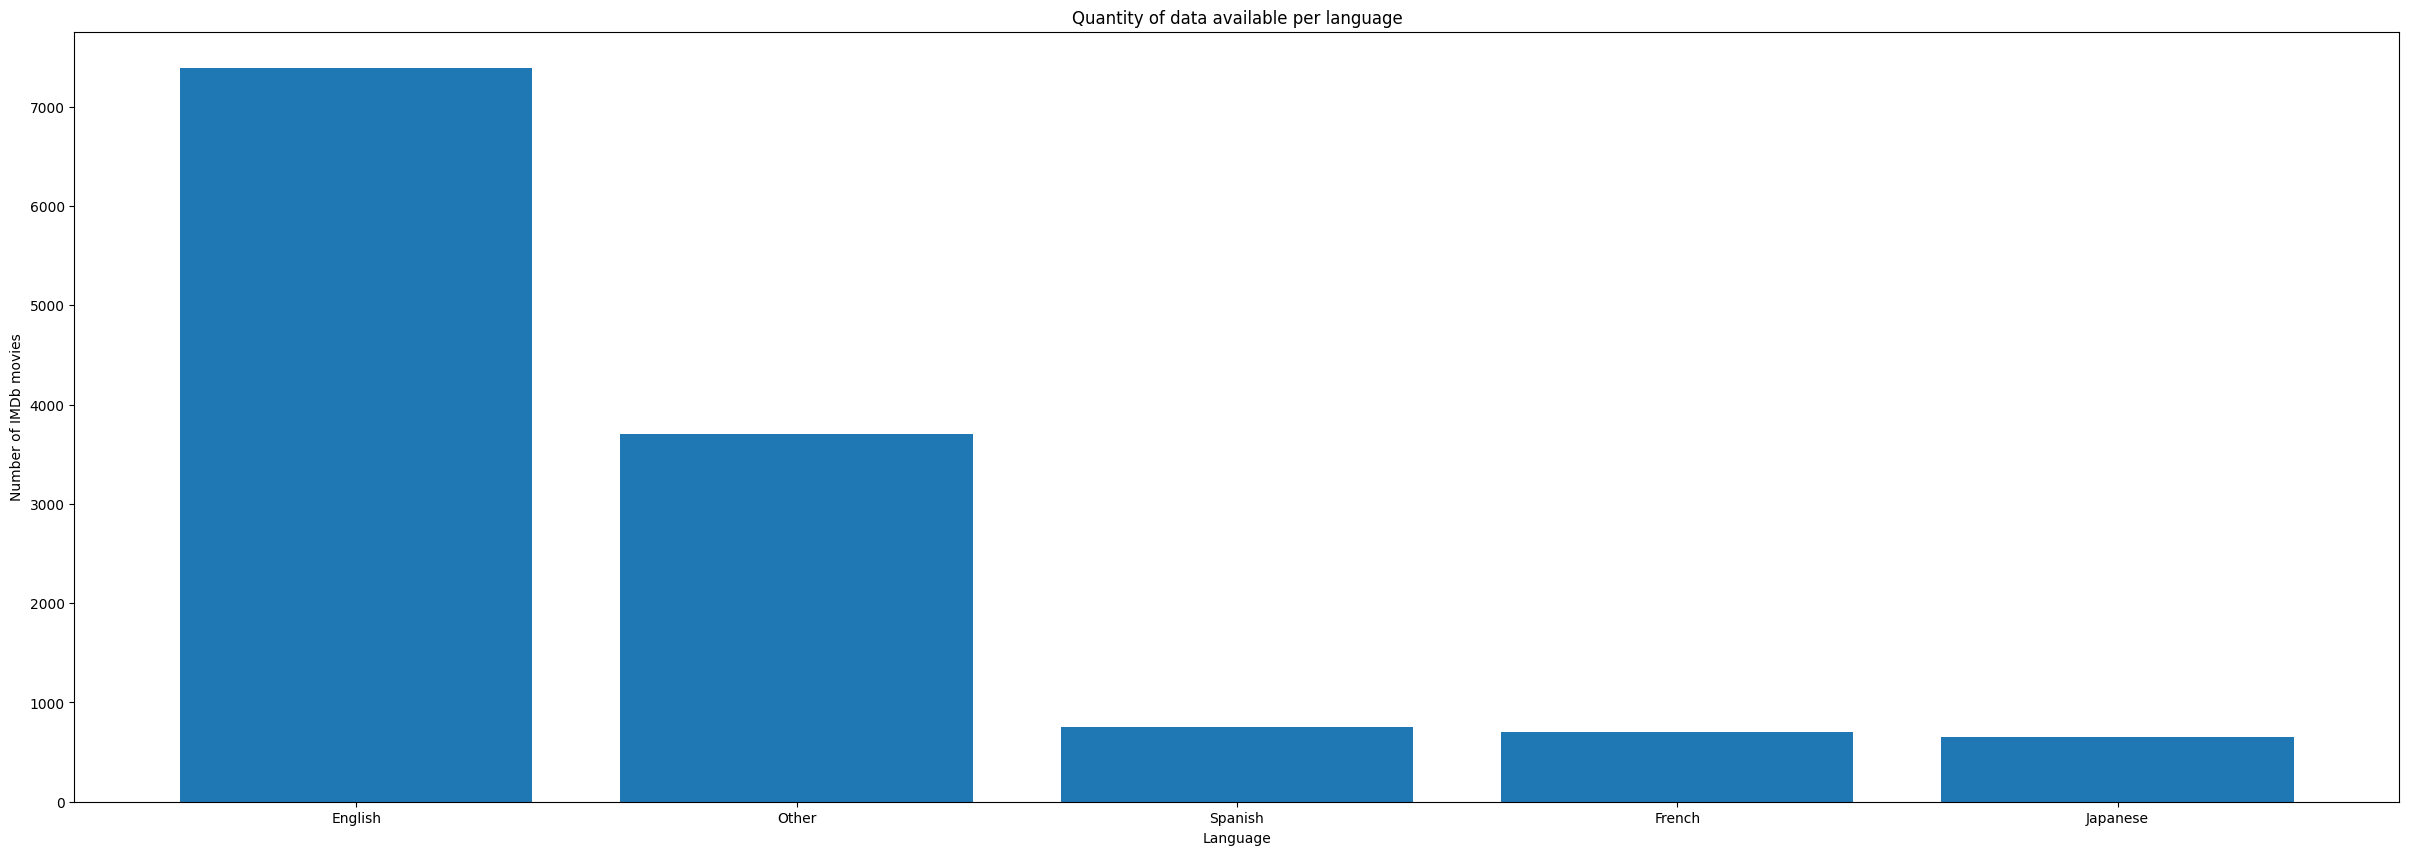

In [8]:
langData = {}

for lang in df['language']:
  if lang not in langData.keys():
    langData[lang]=0
  langData[lang]+=1

sorte = [e[0] for e in sorted(langData.items(), key=lambda x:x[1], reverse = True)][:5]
names = sorte
values = sorted(list(langData.values()), reverse = True)[:5]


plt.figure(figsize=(30,10))
plt.title("Quantity of data available per language")
plt.xlabel("Language")
plt.ylabel("Number of IMDb movies")
plt.bar(range(len(names)), values, tick_label=names)
plt.show()

### 2. An interesting plot; how well do the average user and average critic rate the various genres?

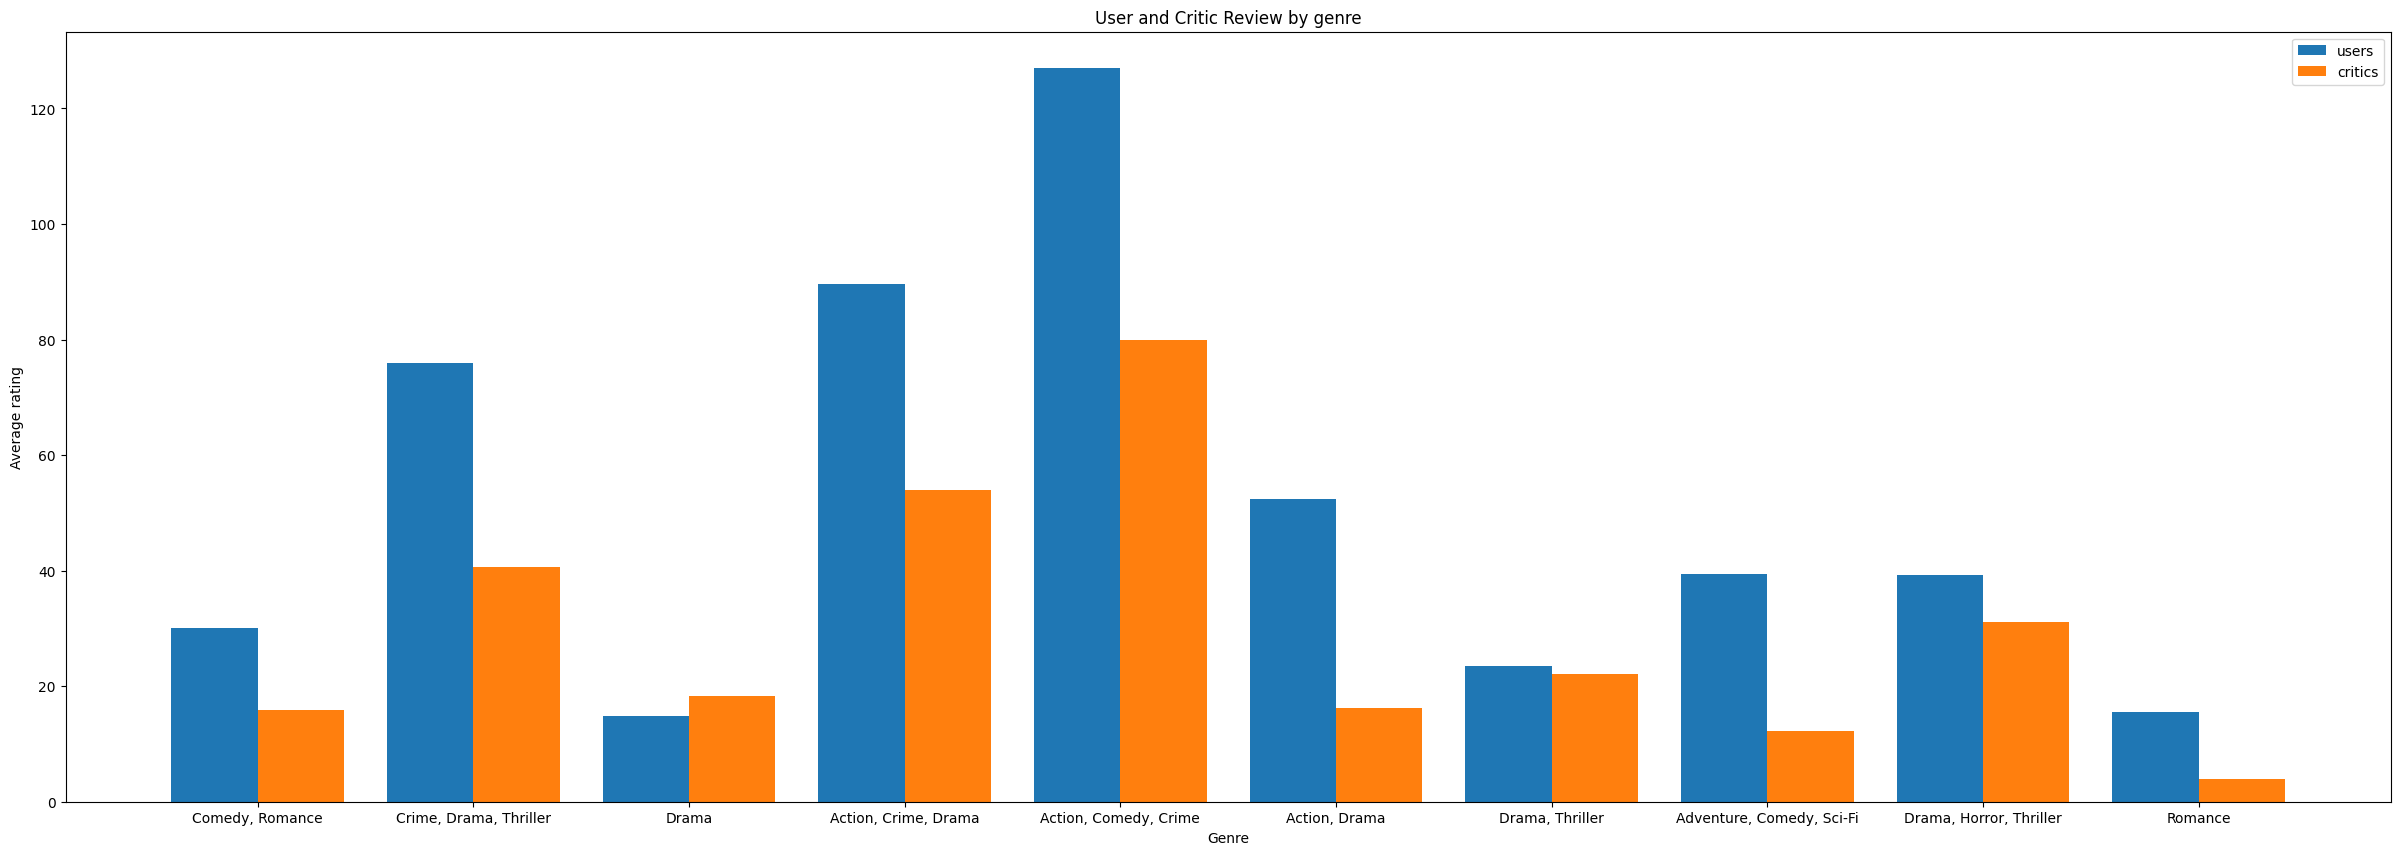

In [9]:
userReviewData = {}
criticReviewData = {}

for i in range(len(df)):
  gen = (df.loc[i, "genre"])
  if df.loc[i, "reviews_from_users"] != 'None':
    uReview = float(df.loc[i, "reviews_from_users"])
    if gen not in userReviewData.keys():
      userReviewData[gen]=[]
    userReviewData[gen].append(uReview)
  if df.loc[i, "reviews_from_critics"] != 'None':
    cReview = float(df.loc[i, "reviews_from_critics"])
    if gen not in criticReviewData.keys():
      criticReviewData[gen]=[]
    criticReviewData[gen].append(cReview)

for gen in userReviewData.keys():
  if userReviewData[gen] != []:
    userReviewData[gen] = sum(userReviewData[gen]) / len(userReviewData[gen])
  else:
    userReviewData[gen] = 0

for gen in criticReviewData.keys():
  if criticReviewData[gen] != []:
    criticReviewData[gen] = sum(criticReviewData[gen]) / len(criticReviewData[gen])
  else:
    criticReviewData[gen] = 0

x = ([str(gen) for gen in userReviewData.keys() if gen in criticReviewData.keys()])[:10]
y2 = ([criticReviewData[gen] for gen in x])[:10]
y1 = ([userReviewData[gen] for gen in x])[:10]

X_axis = np.arange(len(x))
plt.figure(figsize=(30,10))
plt.bar(X_axis - 0.2, y1, 0.4, label = 'users')
plt.bar(X_axis + 0.2, y2, 0.4, label = 'critics')

plt.xticks(X_axis, x)
plt.ylabel("Average rating")
plt.xlabel("Genre")
plt.title("User and Critic Review by genre")
plt.legend()
plt.show()

# Feature engineering

### 1. Converting the genre, actors, and director column from strings to lists

In [10]:
df['director'] = df['director'].map(lambda x: x.split(','))
df['language'] = df['language'].map(lambda x: x.split(','))
df['genre'] = df['genre'].map(lambda x: x.split(','))
df['actors'] = df['actors'].map(lambda x: x.split(',')[:3])

for i in range(len(df)):
    df.at[i,'director'] = [x.lower().replace(' ','') for x in df.at[i,'director']]
    df.at[i,'language'] = [x.lower().replace(' ','') for x in df.at[i,'language']]
    df.at[i,'genre'] = [x.lower().replace(' ','') for x in df.at[i,'genre']]
    df.at[i,'actors'] = [x.lower().replace(' ','') for x in df.at[i,'actors']]

df.head()

,title,year,genre,language,director,actors,description,reviews_from_users,reviews_from_critics
0,Todos os Mortos,2020,[drama],[portuguese],"[marcodutra, caetanogotardo]","[mawusitulani, clarissakiste, carolinabianchi]",1899. The fates of the women in two families b...,None,13.0
1,Maniyarayile Ashokan,2020,"[comedy, romance]",[malayalam],[shamzuzayba],"[jacobgregory, anupamaparameshwaran, s.v.krish...",When his unlucky horoscope doesn't bode well f...,34.0,5.0
2,Mrs. Serial Killer,2020,"[crime, drama, thriller]","[hindi, english]",[shirishkunder],"[jacquelinefernandez, manojbajpayee, mohitraina]",When a doctor gets jailed for a string of shoc...,5261.0,19.0
3,A Day & A Night,2020,[drama],[arabic],[aymanmakram],"[khalednabawy, ahmadel-fishawi, dorrazarrouk]",The film revolves around an officer who undert...,2.0,None
4,Class of '83,2020,"[action, crime, drama]",[hindi],[atulsabharwal],"[bobbydeol, geetikatyagi, monikapanwar]",The story of an upright policeman-turned-train...,194.0,22.0


### 2. Extract keywords from description and store them in another column

In [11]:
myRake = Rake()
df['key_words'] = ''

for i in range(len(df)):
    myRake.extract_keywords_from_text(df.at[i, 'description'])
    gwd = myRake.get_word_degrees()
    df.at[i, 'key_words'] = list(gwd.keys())

df.head()

,title,year,genre,language,director,actors,description,reviews_from_users,reviews_from_critics,key_words
0,Todos os Mortos,2020,[drama],[portuguese],"[marcodutra, caetanogotardo]","[mawusitulani, clarissakiste, carolinabianchi]",1899. The fates of the women in two families b...,None,13.0,"[1899, fates, women, two, families, become, en..."
1,Maniyarayile Ashokan,2020,"[comedy, romance]",[malayalam],[shamzuzayba],"[jacobgregory, anupamaparameshwaran, s.v.krish...",When his unlucky horoscope doesn't bode well f...,34.0,5.0,"[unlucky, horoscope, bode, well, future, wife,..."
2,Mrs. Serial Killer,2020,"[crime, drama, thriller]","[hindi, english]",[shirishkunder],"[jacquelinefernandez, manojbajpayee, mohitraina]",When a doctor gets jailed for a string of shoc...,5261.0,19.0,"[doctor, gets, jailed, string, shocking, murde..."
3,A Day & A Night,2020,[drama],[arabic],[aymanmakram],"[khalednabawy, ahmadel-fishawi, dorrazarrouk]",The film revolves around an officer who undert...,2.0,None,"[film, revolves, around, officer, undertakes, ..."
4,Class of '83,2020,"[action, crime, drama]",[hindi],[atulsabharwal],"[bobbydeol, geetikatyagi, monikapanwar]",The story of an upright policeman-turned-train...,194.0,22.0,"[story, upright, policeman, turned, trainer, w..."


### 3. Fuse all columns in ['genre', 'director', 'actors', 'key_words', 'language'] into a bag of words

In [12]:
df['Bag'] = ''
columns = ['genre', 'director', 'actors', 'key_words', 'language']

for i in range(len(df)):
    bow = ''
    for col in columns:
        bow += ' '.join(df.at[i,col]) + ' '
    df.at[i,'Bag'] = bow

df = df[['title','Bag']]
df.head()

,title,Bag
0,Todos os Mortos,drama marcodutra caetanogotardo mawusitulani c...
1,Maniyarayile Ashokan,comedy romance shamzuzayba jacobgregory anupam...
2,Mrs. Serial Killer,crime drama thriller shirishkunder jacquelinef...
3,A Day & A Night,drama aymanmakram khalednabawy ahmadel-fishawi...
4,Class of '83,action crime drama atulsabharwal bobbydeol gee...


### 4. Get the cosine similarity matrix from the Bag of Words column

In [13]:
cV = CountVectorizer()
My = cV.fit_transform(df['Bag'])
cos = cosine_similarity(My, My)
print(cos)

[[1.         0.         0.03713907 ... 0.04794633 0.1114172  0.03335187]
 [0.         1.         0.04264014 ... 0.         0.04264014 0.        ]
 [0.03713907 0.04264014 1.         ... 0.05163978 0.12       0.07184212]
 ...
 [0.04794633 0.         0.05163978 ... 1.         0.05163978 0.04637389]
 [0.1114172  0.04264014 0.12       ... 0.05163978 1.         0.03592106]
 [0.03335187 0.         0.07184212 ... 0.04637389 0.03592106 1.        ]]


# Predictive task

### 1. Store titles in a pd.Series to retrieve index from title easily

In [14]:
indices = pd.Series(df['title'])
indices.head()

0         Todos os Mortos
1    Maniyarayile Ashokan
2      Mrs. Serial Killer
3         A Day & A Night
4            Class of '83
Name: title, dtype: object

### 2. This function recommends the 10 most similar movies to the movie inputted by user, by sorting the row in the cos matrix corresponding to that movie

In [15]:
def recommend(title, cos = cos):
    reccs = []
    id = indices[indices == title].index[0]
    sorte = pd.Series(cos[id]).sort_values(ascending = False)
    for i in list(sorte.iloc[1:11].index):
        reccs.append(list(df['title'])[i])
        
    return reccs

### 3. Example query. Can query movies as old as 2013

In [20]:
recommend("A Day & A Night")

['Finals',
 'Copperman',
 "Roh's Beauty",
 'Monchora',
 'El-Harami wa el-Abit',
 'Dekh Tamasha Dekh',
 'Hum Chaar',
 'Sheikh Jackson',
 'Sraboner Dhara',
 'Ashke']